In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")


In [2]:
os.chdir('C:\\Users\\linar\\Downloads\\archive (2)')

In [3]:
#set object of both datasets
earlyYears = pd.read_csv('motor_data11-14lats.csv')
laterYears = pd.read_csv('motor_data14-2018.csv')

In [4]:
#make sure that both datasets have similar columns to be joined 
print(f'Early Years Dataset Features: {earlyYears.columns}')
print(f'Later Years Dataset Features: {laterYears.columns}')


Early Years Dataset Features: Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')
Later Years Dataset Features: Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


In [5]:
#concat both datasets into one  and then understand data types as weel as other key info
combined = pd.concat([earlyYears, laterYears], join = 'outer')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802036 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes:

In [6]:
# Show the null values
combined.isnull().sum()
# CLAIM_PAID null can be filled with 0's
# Carrying Capacity might need to be dropped

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              4
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  21
OBJECT_ID                 0
PROD_YEAR               169
SEATS_NUM               235
CARRYING_CAPACITY    198199
TYPE_VEHICLE              0
CCM_TON                   8
MAKE                      5
USAGE                     0
CLAIM_PAID           741891
dtype: int64

In [7]:
#replacing nan values with 0 to use
combined['CLAIM_PAID'] = combined['CLAIM_PAID'].replace({np.nan : 0})
#changing values using regex operators to be used in ML model
combined['EFFECTIVE_YR'] = combined['EFFECTIVE_YR'].replace(['/', '-', 'B', 'S', 'R', 'EN', 'MO', 'IN', 'SS', 'RS', 'SR', 'EA', 'BS', '4A', '1A', '1K', '1M', '2A', '1C', '6A', '5A', '3A', '5C', '7A'], np.nan, regex=True)
combined.sample(10)


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
84189,0,14-OCT-13,13-OCT-14,11,1202,1400000.0,8864.950,5000133224,2010.0,4.0,7.0,Pick-up,2435.0,MITSUBISHI,Own Goods,0.0
35794,0,08-JUL-13,07-JUL-14,11,1202,0.0,5052.870,5000050191,2000.0,2.0,54.0,Truck,4334.0,ISUZU,Own Goods,0.0
371389,0,08-AUG-16,07-AUG-17,11,1201,2253000.0,26117.330,5000818430,2015.0,8.0,NaN,Station Wagones,2835.0,MITSUBISHI,Private,0.0
215400,0,10-JAN-12,23-MAY-12,12,1202,0.0,1373.520,5000325561,2008.0,25.0,0.0,Bus,4214.0,TOYOTA,Own service,0.0
67380,0,08-JUL-11,07-AUG-11,11,1202,500000.0,291.060,5000109757,2000.0,0.0,NaN,Truck,0.0,TRAKKER,Own Goods,0.0
26786,1,27-SEP-11,26-SEP-12,08,1201,200000.0,3865.937,5000030657,1986.0,5.0,NaN,Automobile,1295.0,TOYOTA,Private,0.0
206769,2,11-AUG-17,10-AUG-18,13,1201,0.0,541.300,5000494284,1994.0,4.0,NaN,Automobile,1590.0,SUZUKI,Private,0.0
400669,1,29-OCT-16,15-APR-17,16,1202,730000.0,25467.880,5000899857,2015.0,2.0,0.0,Truck,4570.0,ISUZU,General Cartage,0.0
97490,1,04-JAN-16,03-JAN-17,11,1202,450000.0,12236.460,5000168099,1994.0,1.0,86.0,Truck,2000.0,SCANIA,General Cartage,0.0
98457,1,09-JUL-12,08-JUL-13,12,1202,0.0,3456.697,5000129519,2004.0,24.0,0.0,Bus,4334.0,ISUZU,Fare Paying Passengers,0.0


In [8]:
#correct the typo of some entries being entered as MERCEEDES and not mercedes
combined['MAKE'] = combined['MAKE'].replace({'MERCEEDES': 'MERCEDES'})

In [9]:
# Filter rows where 'MAKE' is 'FIAT', 'TYPE_VEHICLE' is 'Bus', and 'USAGE' is 'Fare Paying Passengers'
filtered_rows = (combined['MAKE'] == 'FIAT') & (combined['TYPE_VEHICLE'] == 'Bus') & (combined['USAGE'] == 'Fare Paying Passengers')

# Replace 'CARRYING_CAPACITY' values with the median for the filtered rows
combined.loc[filtered_rows, 'CARRYING_CAPACITY'] = combined[filtered_rows]['CARRYING_CAPACITY'].replace({0: combined[filtered_rows]['CARRYING_CAPACITY'].median()})

In [10]:
# Filter rows where 'MAKE' is 'MERCEDES', 'TYPE_VEHICLE' is 'Tanker'
condition = (combined['MAKE'] == 'MERCEDES') & (combined['TYPE_VEHICLE'] == 'Tanker')

# Replace 0 values with NaN for the specified columns and condition
combined.loc[condition, ['CCM_TON', 'CARRYING_CAPACITY', 'SEATS_NUM']] = combined.loc[condition, ['CCM_TON', 'CARRYING_CAPACITY', 'SEATS_NUM']].replace(0, np.nan)

# Calculate medians for each column for the specified condition
medians = combined.loc[condition, ['CCM_TON', 'CARRYING_CAPACITY', 'SEATS_NUM']].median()

# Replace NaN values with the respective medians for the specified condition
combined.loc[condition, ['CCM_TON', 'CARRYING_CAPACITY', 'SEATS_NUM']] = combined.loc[condition, ['CCM_TON', 'CARRYING_CAPACITY', 'SEATS_NUM']].fillna(medians)



In [11]:
# List of makes to drop
makes_to_drop = ['ZZ', 'ZIL', 'SPAIN']

# Filter rows that should be kept
combined = combined[~combined['MAKE'].isin(makes_to_drop)]

# Verify the changes
print(combined[combined['MAKE'].isin(makes_to_drop)])


Empty DataFrame
Columns: [SEX, INSR_BEGIN, INSR_END, EFFECTIVE_YR, INSR_TYPE, INSURED_VALUE, PREMIUM, OBJECT_ID, PROD_YEAR, SEATS_NUM, CARRYING_CAPACITY, TYPE_VEHICLE, CCM_TON, MAKE, USAGE, CLAIM_PAID]
Index: []


In [12]:
# Define the conditions
condition = combined[(combined['USAGE'].isin(['Fare Paying Passengers', 'Taxi'])) 
         & (combined['SEATS_NUM'] == 0) & (combined['TYPE_VEHICLE'] != 'Motor-cycle')]

condition2 = combined[(combined['USAGE'].isin(['Fare Paying Passengers', 'Taxi'])) & (combined['MAKE'] == 'TOYOTA')
                      & (combined['TYPE_VEHICLE'] == 'BUS')]

# Calculate median values from condition2
median_values_condition2 = condition2[['SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']].median()

# Impute median values to the original combined DataFrame for the specified conditions
combined.loc[condition.index, ['SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']] = \
    combined.loc[condition.index, ['SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']].fillna(median_values_condition2)

# Verify the changes
print(combined.loc[condition.index, ['SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']])

        SEATS_NUM  CARRYING_CAPACITY  CCM_TON
61435         0.0              400.0      0.0
61435         1.0              156.9   9726.0
61436         0.0              400.0      0.0
61436         4.0                4.0   1295.0
61437         0.0              400.0      0.0
...           ...                ...      ...
480585        0.0                0.0      0.0
480586        0.0                0.0      0.0
486024        0.0                0.0      0.0
491463        0.0               14.0      0.0
491464        0.0               14.0      0.0

[176 rows x 3 columns]


In [13]:
#change the value of a single point because it is not likely a taxi has no seats
combined['SEATS_NUM'].loc[274197] = combined[(combined['USAGE']== 'Taxi') & (combined['MAKE'] == 'BAJAJI')]['SEATS_NUM'].median()

In [14]:
#change the numerical values for insurance type to categorical for visualization purposes
combined['INSR_TYPE'] = combined['INSR_TYPE'].replace({1201: 'Private' , 1202: 'Commercial', 1204:'Motor trade road risk'})

In [15]:
#drop null values 
combined = combined.dropna()
combined.isnull().sum()

SEX                  0
INSR_BEGIN           0
INSR_END             0
EFFECTIVE_YR         0
INSR_TYPE            0
INSURED_VALUE        0
PREMIUM              0
OBJECT_ID            0
PROD_YEAR            0
SEATS_NUM            0
CARRYING_CAPACITY    0
TYPE_VEHICLE         0
CCM_TON              0
MAKE                 0
USAGE                0
CLAIM_PAID           0
dtype: int64

In [16]:
#print the unique values of each column
print(f"Unique Values in INSR_TYPE: \n {combined['INSR_TYPE'].unique()}")
print(f"Unique Values in TYPE_VEHICLE: \n{combined['TYPE_VEHICLE'].unique()}")
print(f"Unique Values in MAKE: \n{combined['MAKE'].unique()}")
print(f"Unique Values in USAGE: \n{combined['USAGE'].unique()}")


Unique Values in INSR_TYPE: 
 ['Commercial' 'Private' 'Motor trade road risk']
Unique Values in TYPE_VEHICLE: 
['Pick-up' 'Truck' 'Bus' 'Tanker' 'Trailers and semitrailers' 'Automobile'
 'Motor-cycle' 'Tractor' 'Station Wagones' 'Special construction'
 'Trade plates']
Unique Values in MAKE: 
['NISSAN' 'TOYOTA' 'IVECO' 'MITSUBISHI' 'FIAT' 'MARU' 'ISUZU' 'MERCEDES'
 'YAMAHA' 'MESFIN' 'CALABRASE' 'DAF' 'FARID' 'TRAILER' 'SINO' 'ISUSU'
 'HOWO' 'HIGHER' 'ISUZU FVR' 'FORD' 'PEUGEOT' 'TOMSON' 'DAEWOO' 'VIBERTI'
 'CALABRESE' 'ROZA' 'JIEFANG' 'RENAULT' 'CRANE' 'TURBO BUS' 'BISHOFTU'
 'SCANIA' 'TRAKKER' 'SCHMITZ' 'NATFA' 'ROLFO' 'INTERNATIONAL USE' 'MAZDA'
 'NEW HOLLAND' 'NEW HOLAND' 'TURBO' 'MACK' 'MTE' 'ORAL' 'DUNGFING'
 'SUZUKI' 'HYUNDAI' 'NAMI' 'NISSAN UD' 'VOLVO' 'HIGER BUS' 'AEOLUS' 'TATA'
 '330-30 TRA' 'EU. TRAILER' 'HINO' 'VERYCA' 'AMBULANCE' 'ADGE' 'LOWBED'
 'LADA' 'CHEVROLET' 'MERCEEDICE' 'CACCIAMALLI' 'DAYUN' 'BELARUS'
 'VOLKS WAGON' 'RANDON' 'GMC' 'CORDES' 'HIGH BED TRAILER' 'KIA'
 '

In [17]:
#store the newly combined dataframe to a csv file
combined.to_csv('processed_combined.csv')

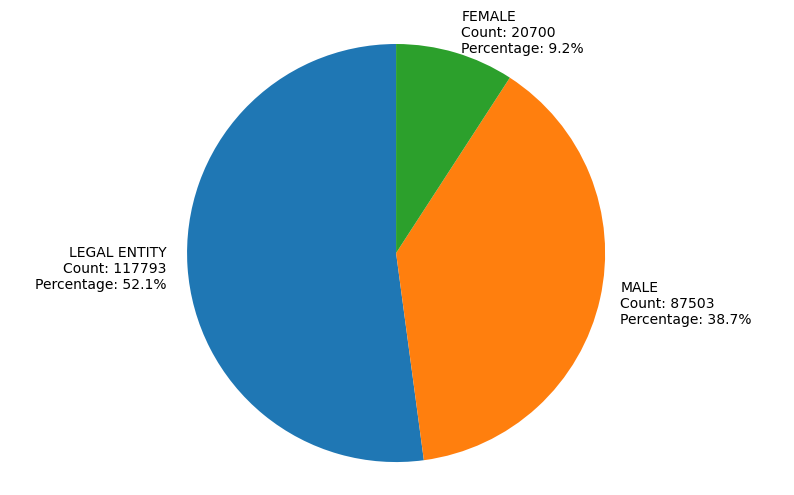

In [18]:
#pie chart that shows count percentage and type of sex
data = combined.groupby(['OBJECT_ID', 'SEX']).size().reset_index(name='COUNT')
pie_counts = data['SEX'].value_counts()
labels = ['LEGAL ENTITY', 'MALE', 'FEMALE']

# Create a pie chart with labels, counts, and percentages
plt.figure(figsize=(10, 6))
plt.pie(pie_counts, labels=[f"{label}\nCount: {count}\nPercentage: {percent:.1f}%" for label, 
        count, percent in zip(labels, pie_counts, pie_counts / pie_counts.sum() * 100)],
        autopct='', startangle=90)
plt.axis('equal')
plt.savefig('Pie_chart.png', dpi=300) 
# Show the plot
plt.show()

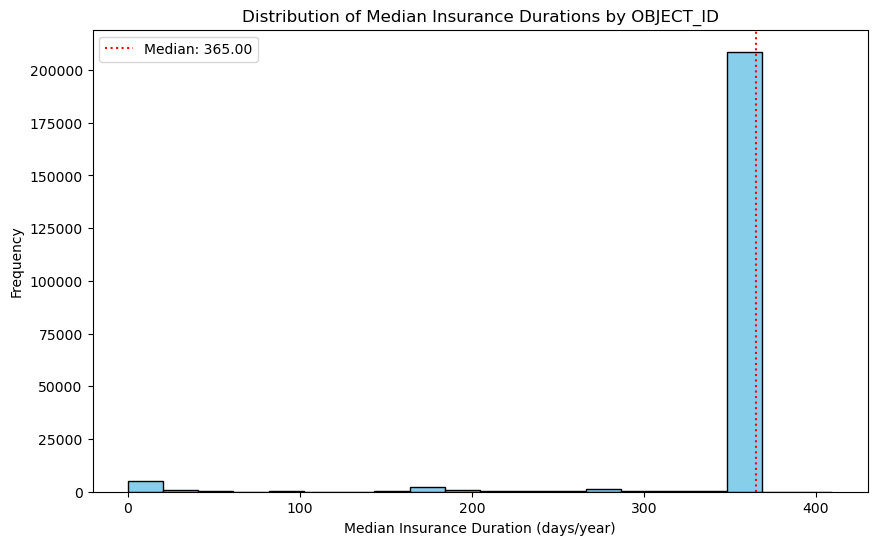

In [19]:
#chart to understand the distribution and average insurance duration 

# Convert date columns to datetime
combined['INSR_BEGIN'] = pd.to_datetime(combined['INSR_BEGIN'], format='%d-%b-%y')
combined['INSR_END'] = pd.to_datetime(combined['INSR_END'], format='%d-%b-%y')

# Calculate the insurance duration in days and round up
combined['INSURANCE_DURATION'] = np.ceil((combined['INSR_END'] - combined['INSR_BEGIN']).dt.total_seconds() / (24 * 3600))

# Group by OBJECT_ID and take the median
grouped_data = combined.groupby('OBJECT_ID')['INSURANCE_DURATION'].median()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_data, bins=20, color='skyblue', edgecolor='black')

# Add a dotted vertical line at the median
median_value = grouped_data.median()
plt.axvline(median_value, color='red', linestyle='dotted', label=f'Median: {median_value:.2f}')

# Add labels and title
plt.xlabel('Median Insurance Duration (days/year)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Insurance Durations by OBJECT_ID')

# Add legend
plt.legend()
plt.savefig('DurationHist.png', dpi=300) 
# Show the plot
plt.show()


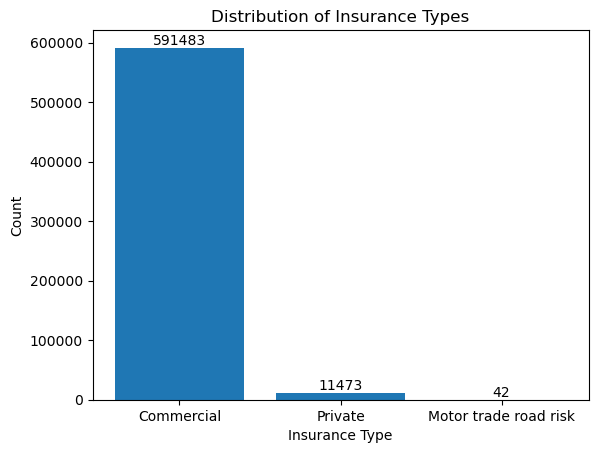

In [21]:
# show the distribution of insr_type to get a feel for the most common insurance type

# Get the value counts from the 'INSR_TYPE' column
insr_type_counts = combined['INSR_TYPE'].value_counts()

# Extract the values and counts
values = insr_type_counts.index
counts = insr_type_counts.values

# Manually set x-axis positions for the specific values
x_positions = [1, 2, 3]  # Adjust the positions as needed

bar_width = 0.8  # Adjust the width of the bars
plt.bar(x_positions, counts, width=bar_width, align='center')

# Annotate each bar with its count value
for x, count in zip(x_positions, counts):
    plt.text(x, count, round(count, 2), ha='center', va='bottom')

# Set x-axis ticks and labels
plt.xticks(x_positions, values)

# Add labels and title
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.title('Distribution of Insurance Types')
#
plt.savefig('DistributionHist.png', dpi=300) 
# Show the plot
plt.show()


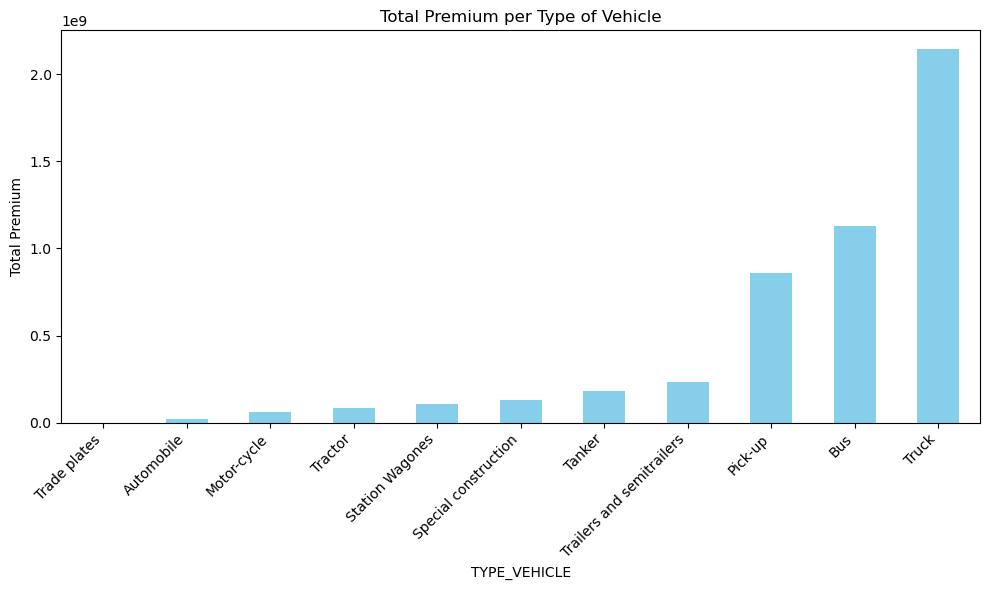

In [22]:
import matplotlib.pyplot as plt

# sum of premium per type of vehicle
premium_per_vehicle = combined.groupby('TYPE_VEHICLE')['PREMIUM'].sum().sort_values()

plt.figure(figsize=(10, 6))
premium_per_vehicle.plot(kind='bar', color='skyblue')
plt.xlabel('TYPE_VEHICLE')
plt.ylabel('Total Premium')
plt.title('Total Premium per Type of Vehicle')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig('total_premium_per_vehicle.png', dpi=300)  
plt.show()


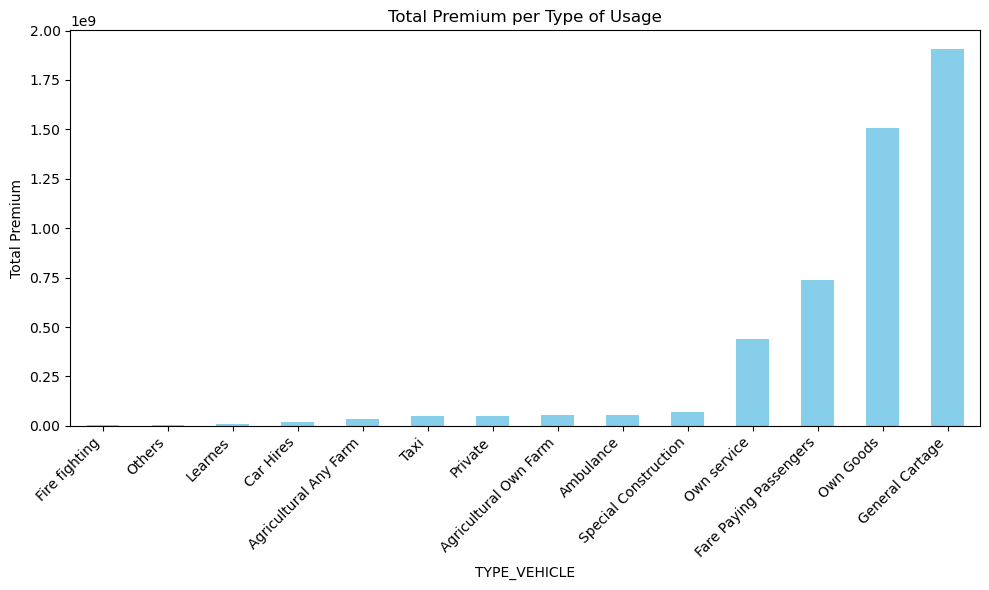

In [23]:
import matplotlib.pyplot as plt

# sum of premium per type of usage
premium_per_vehicle = combined.groupby('USAGE')['PREMIUM'].sum().sort_values()

plt.figure(figsize=(10, 6))
premium_per_vehicle.plot(kind='bar', color='skyblue')
plt.xlabel('TYPE_VEHICLE')
plt.ylabel('Total Premium')
plt.title('Total Premium per Type of Usage')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig('total_premium_per_usage.png', dpi=300)  
plt.show()


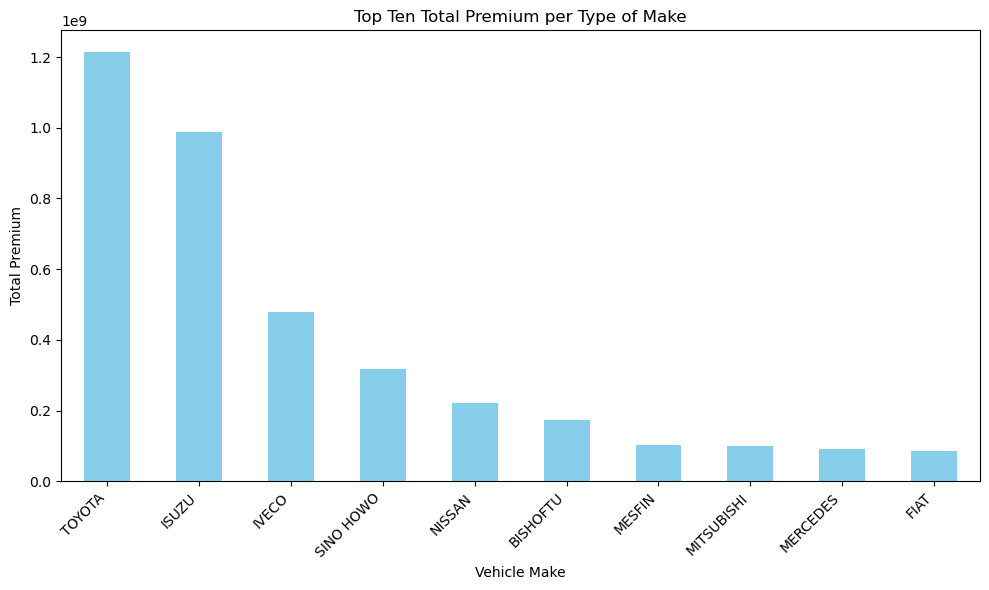

In [24]:
# sum of premium per type of make
premium_per_vehicle = combined.groupby('MAKE')['PREMIUM'].sum().sort_values(ascending=False)
top_ten_premium_per_vehicle = premium_per_vehicle.head(10)
plt.figure(figsize=(10, 6))
top_ten_premium_per_vehicle.plot(kind='bar', color='skyblue')
plt.xlabel('Vehicle Make')
plt.ylabel('Total Premium')
plt.title('Top Ten Total Premium per Type of Make')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig('./charts/top_ten_total_premium_per_make.png', dpi=300)  
plt.show()


In [25]:
#revert insr_type back to int values for modeling purposes
combined['INSR_TYPE'] = combined['INSR_TYPE'].replace({'Private': 1201 ,  'Commercial': 1202, 'Motor trade road risk': 1204})


In [26]:
#final check to make sure effective year has no string values that cannot be converted to numeric if so it will be set as na and 
#dropped
combined['EFFECTIVE_YR'] = pd.to_numeric(combined['EFFECTIVE_YR'], errors='coerce')
combined = combined.dropna(subset=['EFFECTIVE_YR'])
combined['EFFECTIVE_YR'].astype(int)

0          8
1          8
2          8
3          8
4          8
          ..
508494    12
508495    12
508496    12
508497    12
508498    12
Name: EFFECTIVE_YR, Length: 602998, dtype: int32

In [27]:
# Encoding to turn columns with string dtypes into binary (1, 0 ) for modeling purposes

combined= pd.get_dummies(combined, columns=['INSR_TYPE', 'TYPE_VEHICLE', 'MAKE', 'USAGE'])

#converting effective yr to integer
combined['EFFECTIVE_YR'] = combined['EFFECTIVE_YR'].astype(int)
#checking to dtypes of columns
object_columns = combined.select_dtypes(include=['object'])
print(object_columns.columns)


Index([], dtype='object')


In [28]:
#splitting the dataset into train and testing sets

from sklearn.model_selection import train_test_split, GridSearchCV
df = combined.drop([ 'INSR_BEGIN', 'INSR_END', 'OBJECT_ID'], axis=1)

X = df.drop('PREMIUM', axis=1)
y = df['PREMIUM']
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2 , random_state=100)

In [29]:
#creating a method that when called will show the respective metrics for that model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def get_scores(selected_model):


    

    # Make predictions
    y_pred = selected_model.predict(X_test)

    # Calculate MAE, MSE, R², and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"RMSE: {rmse}")


In [30]:
#fitting the linear regression model and making predictions
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd



model = LinearRegression()

model.fit(X_train, y_train)

model.predict(X_test)


array([ -4941.53950258,  19884.43211457,  14246.73776803, ...,
       -12659.34630673,   4765.07460546,    181.50136731])

In [31]:
#metrics for linear regression
get_scores(model)

MAE: 3772.4816428482827
MSE: 45210648.57377657
R-squared (R²): 0.6398425641015496
RMSE: 6723.886418863466


In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor


# Creating and training the Random Forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [33]:
#metrics for the random forest model
get_scores(forest_model)

MAE: 1423.0917270286052
MSE: 17028629.135775603
R-squared (R²): 0.8643463962610816
RMSE: 4126.575957834243


In [34]:
#lets also now test a decision tree
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor


# Creating and training the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [35]:
#metrics for decision tree
get_scores(tree_model)

MAE: 1586.3865443477077
MSE: 22879163.295790184
R-squared (R²): 0.8177398235137635
RMSE: 4783.216835539675


In [ ]:
#run if to install yellowbrick for charts below if need be
! pip install yellowbrick

<AxesSubplot:title={'center':'Prediction Error for Regression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

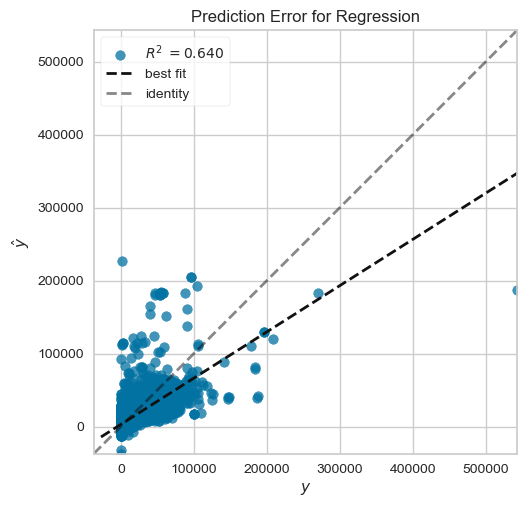

In [39]:
#visualize the regression model

from yellowbrick.regressor import PredictionError


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(model, title="Prediction Error for Regression", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Regression_prediction_error_visualization.png") 



<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

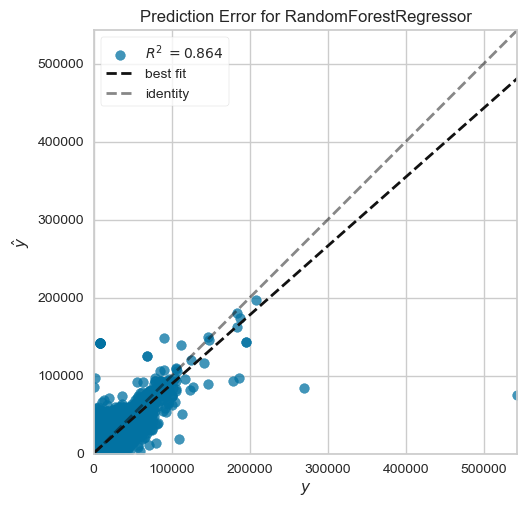

In [40]:
#visualize the random forest model 
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score

y_pred = forest_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(forest_model, title="Prediction Error for RandomForestRegressor", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Forest_prediction_error_visualization.png") 


<AxesSubplot:title={'center':'Prediction Error for Regression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

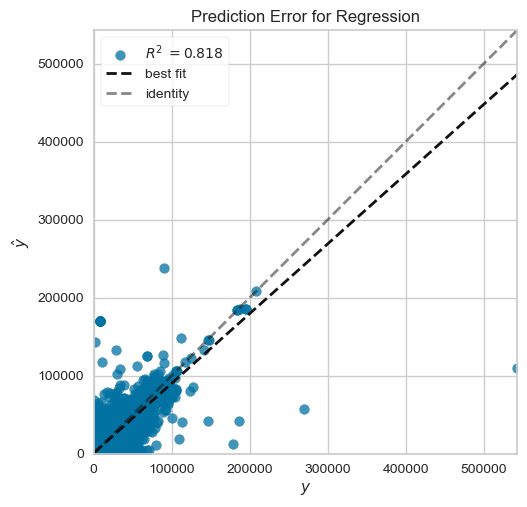

In [41]:
y_pred = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


visualizer = PredictionError(tree_model, title="Prediction Error for Regression", xlabel="Predicted Value", ylabel="True Value")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="Tree_prediction_error_visualization.png") 



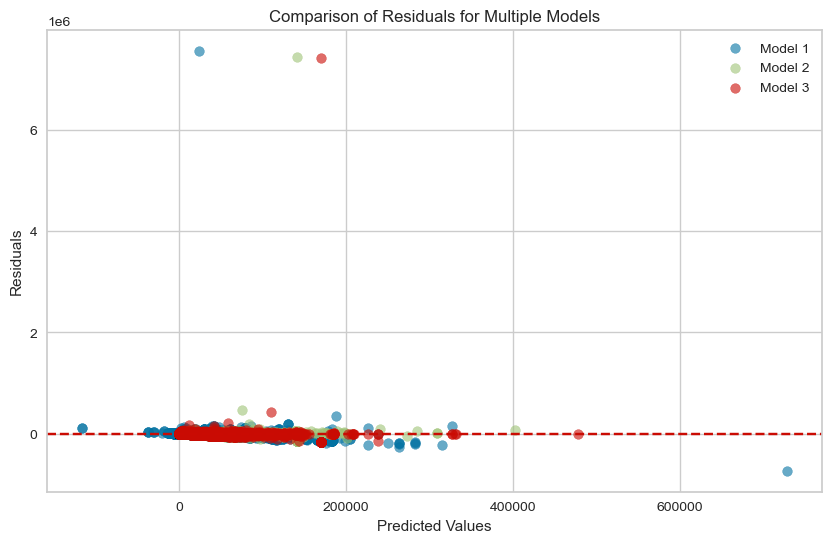

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


models = [model, forest_model, tree_model]  # List of models

plt.figure(figsize=(10, 6))

for i, model in enumerate(models):
    y_pred = model.predict(X)
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, label=f"Model {i+1}", alpha=0.6)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Comparison of Residuals for Multiple Models")
plt.axhline(y=0, color='r', linestyle='--') 
plt.legend()
plt.savefig("multiple_models_residuals_plot.png")  
plt.show()


In [44]:
# visualizer = ResidualsPlot(forest_model, hist=False, qqplot=True, line_color='r')
# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show(outpath="forest_)residuals_plot.png") 